In [1]:
from notebook_config import *

Numpy: 1.20.3
Pandas: 1.3.4
Sklearn: 1.0.2
Matplotlib: 3.4.3
Seaborn: 0.11.2


# Table of Contents  
- [Exploratory Data Analysis](#eda)  
    - [Overview](#overview)  
    - [Extracting Address Information](#address)  
    - [Target Distribuition](#target)  
- [Modeling](#modeling)  
    - [Baseline](#cycle1)  
    - [ElasticNet](#cycle2)  
    - [XGBoost Regressor](#cycle3)  
- [Deploy](#deploy)  

## <span id='eda' style='color:Gold'>Exploratory Data Analysis

### <span id='overview' style='color:#1696d2'>Overview

The file **usa_housing.csv** consists of a dataset that contains information about the price of homes in certain regions of the United States. A description of the columns of this dataframe is presented below:  

In [2]:
df = pd.read_csv('datasets/house_prices.csv')
pd.set_option('display.max_columns', 90)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df.shape

(1460, 81)

In [4]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
df.describe(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [16]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


Checking null values

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<Figure size 720x576 with 0 Axes>

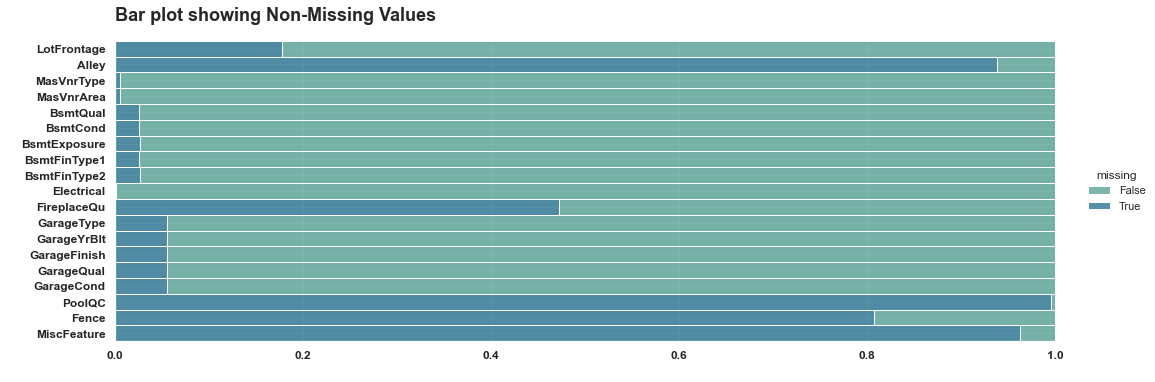

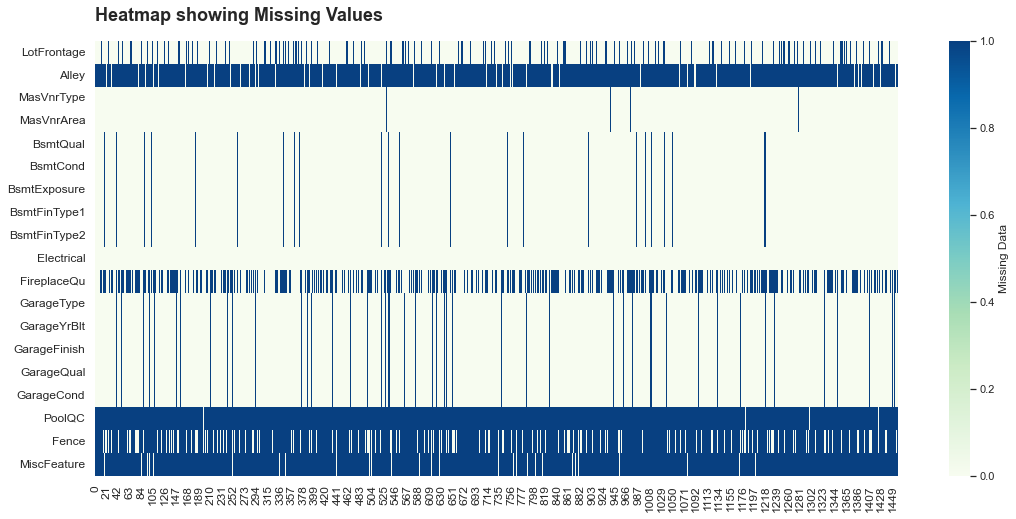

In [5]:
display_na(df)

### <span id='target' style='color:#1696d2'>Target Variable - SalePrice

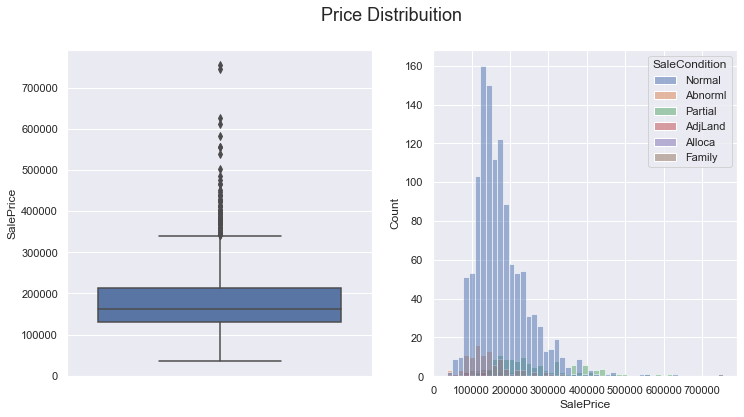

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(y=df.SalePrice, ax=ax[0])
sns.histplot(data=df, x='SalePrice', hue='SaleCondition', ax=ax[1], color=colors['gray'])
plt.suptitle('Price Distribuition', fontsize=18);

Checking any possible relation with *SlaeCondition* feature and *SalePrice* outliers

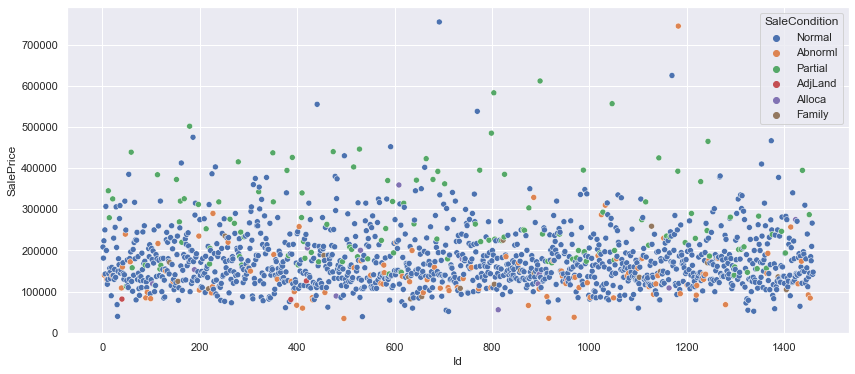

In [29]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='Id',y='SalePrice', hue='SaleCondition');

In [40]:
from biokit.viz import corrplot
import plotly.express as px

In [47]:
fig = px.imshow(df.corr(), color_continuous_scale='RdBu_r', origin='lower')
fig.update_layout(
	title='Correlation Heatmap',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    )
)
fig.show()

In [ ]:
sns.pairplot(df)

## <span id='modeling' style='color:Gold'>Modeling

### <span id='cycle1' style='color:#1696d2'>First Cycle - Baseline model

Baseline model settings:  
- Only numeric features  
- Drop null values or features with null values

In [3]:
baseline_df = df.select_dtypes(include=np.number).drop('Id', axis=1)
null_values = baseline_df.isna().sum()
# check nul values
print(f'Data loss if keep all features and removing null values: {1 - (baseline_df.dropna().size / baseline_df.size):.2f} %')
print(f'Data if removing features with null values: {1 - (baseline_df.drop(null_values[null_values > 0].index, axis=1).size / baseline_df.size):.2f} %')
print('Features with null values:')
null_values[null_values > 0]

Data loss if keep all features and removing null values: 0.23 %
Data if removing features with null values: 0.08 %
Features with null values:


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Removing features with null values

In [4]:
baseline_df.drop(null_values[null_values > 0].index, axis=1, inplace=True)

Creating train/test data

In [5]:
# define target and features (exclude categorical features for the first cycle)
X = baseline_df.drop('SalePrice', axis=1)
y = baseline_df['SalePrice']

# split into traintest data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Statsmodels OLS

In [6]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_const, hasconst = True).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:47:34   Log-Likelihood:                -13853.
No. Observations:                1168   AIC:                         2.777e+04
Df Residuals:                    1136   BIC:                         2.793e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.841e+04   1.59e+06     -0.030      0.976   -3.16e+06    3.07e+06
MSSubClass     -175.5487     29.426     -5.966      0.000    -233.283    -117.814
LotArea           0.4092      0.104      3.921      0.000       0.204       0.614
OverallQual     1.85e+04   1316.071     14.054      0.000    1.59e+04    2.11e+04
OverallCond    3835.7371   1136.787      3.374      0.001    1605.299    6066.175
YearBuilt       337.3129     67.271      5.014      0.000     205.324     469.302
YearRemodAdd    180.2099     72.705      2.479      0.013      37.560     322.860
BsmtFinSF1       10.0462      2.808      3.578      0.000       4.537      15.556
BsmtFinSF2       -4.6161      5.162     -0.894      0.371     -14.744       5.512
BsmtUnfSF         0.3828      2.736      0.140      0.889      -4.985       5.751
TotalBsmtSF       5.8129      3.844      1.512      0.131      -1.729      13.355
1stFlrSF         13.1240      6.936      1.892      0.059      -0.484      26.732
2ndFlrSF         14.2134      6.356      2.236      0.026       1.743      26.684
LowQualFinSF      4.5042     16.723      0.269      0.788     -28.307      37.315
GrLivArea        31.8417      6.409      4.968      0.000      19.266      44.417
BsmtFullBath   1.105e+04   2893.929      3.818      0.000    5371.234    1.67e+04
BsmtHalfBath   -326.5185   4628.826     -0.071      0.944   -9408.528    8755.491
FullBath       3426.0613   3170.299      1.081      0.280   -2794.239    9646.361
HalfBath      -1665.3151   2950.066     -0.565      0.573   -7453.505    4122.875
BedroomAbvGr  -9088.1008   1935.765     -4.695      0.000   -1.29e+04   -5290.025
KitchenAbvGr   -1.01e+04   5782.275     -1.746      0.081   -2.14e+04    1247.939
TotRmsAbvGrd   5101.0013   1402.663      3.637      0.000    2348.900    7853.103
Fireplaces     4370.2156   1965.541      2.223      0.026     513.718    8226.713
GarageCars     1.161e+04   3211.709      3.614      0.000    5305.944    1.79e+04
GarageArea        0.5586     11.017      0.051      0.960     -21.058      22.175
WoodDeckSF       25.5639      8.650      2.955      0.003       8.592      42.536
OpenPorchSF      -6.6256     16.204     -0.409      0.683     -38.420      25.168
EnclosedPorch     7.0691     18.650      0.379      0.705     -29.523      43.661
3SsnPorch        38.5262     32.680      1.179      0.239     -25.594     102.646
ScreenPorch      65.5990     19.328      3.394      0.001      27.676     103.522
PoolArea        -37.3443     25.837     -1.445      0.149     -88.038      13.349
MiscVal          -0.7157      1.864     -0.384      0.701      -4.373       2.941
MoSold         -209.4338    390.702     -0.536      0.592    -976.011     557.144
YrSold         -514.5240    789.337     -0.652      0.515   -2063.247    1034.199
=================================================

#### Sklearn Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg = LinearRegression().fit(X_train, y_train)

display_metrics(X_train, X_test, y_train, y_test, estimator=reg)

Train metrics:
r2_score: 0.80
mean_absolute_error: 21054.72
mean_squared_error: 1172457715.72
Test metrics:
r2_score: 0.82
mean_absolute_error: 22938.25
mean_squared_error: 1392205606.20


### <span id='cycle2' style='color:#1696d2'>Second Cycle - Using Pipeline and GridSearch

In [18]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from sklearn.svm import SVR

In [21]:
# sklearn libraries import
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

# pre-processing and estimator
pipeline = Pipeline([
                    ('std', StandardScaler()),
                    ('regr', ElasticNet(random_state=42))
])

# gridsearch parameters
param_grid = {
    'regr__alpha' : np.linspace(0.5,10,20),
    'regr__l1_ratio' : np.linspace(0,1,11),
    'regr__max_iter' : [1000, 2000, 3000],
    'regr__fit_intercept' : [True, False]
}

# metrics to evaluate
metrics = 'neg_mean_absolute_error'

# cross validation method
splitter = KFold(n_splits=5, shuffle=True, random_state=42)

# search for best "spots"of hyperparameters
search_cv = RandomizedSearchCV(
                            estimator=pipeline,
                            param_grid=param_grid,
                            scoring=metrics,
                            cv=splitter,
                            verbose=10
)

regr_grid = GridSearchCV(
                        estimator=pipeline,
                        param_grid=param_grid,
                        scoring=metrics,
                        cv=splitter,
                        verbose=10
)

# fit models
regr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1320 candidates, totalling 6600 fits
[CV 1/5; 1/1320] START regr__alpha=0.5, regr__fit_intercept=True, regr__l1_ratio=0.0, regr__max_iter=1000
[CV 1/5; 1/1320] END regr__alpha=0.5, regr__fit_intercept=True, regr__l1_ratio=0.0, regr__max_iter=1000;, score=-22527.097 total time=   0.1s
[CV 2/5; 1/1320] START regr__alpha=0.5, regr__fit_intercept=True, regr__l1_ratio=0.0, regr__max_iter=1000
[CV 2/5; 1/1320] END regr__alpha=0.5, regr__fit_intercept=True, regr__l1_ratio=0.0, regr__max_iter=1000;, score=-22410.398 total time=   0.1s
[CV 3/5; 1/1320] START regr__alpha=0.5, regr__fit_intercept=True, regr__l1_ratio=0.0, regr__max_iter=1000
[CV 3/5; 1/1320] END regr__alpha=0.5, regr__fit_intercept=True, regr__l1_ratio=0.0, regr__max_iter=1000;, score=-22677.627 total time=   0.1s
[CV 4/5; 1/1320] START regr__alpha=0.5, regr__fit_intercept=True, regr__l1_ratio=0.0, regr__max_iter=1000
[CV 4/5; 1/1320] END regr__alpha=0.5, regr__fit_intercept=True, regr__l1_ratio=0.0, r

In [ ]:
RandomizedSearchCV()

In [22]:
# display metrics
display_metrics(X_train, X_test, y_train, y_test, estimator=regr_grid)

Train metrics:
r2_score: 0.80
mean_absolute_error: 20922.44
mean_squared_error: 1220904735.64
Test metrics:
r2_score: 0.81
mean_absolute_error: 22260.01
mean_squared_error: 1481645151.80


In [ ]:
pd.DataFrame(regr_grid.cv_results_).sort_values('rank_test_score').head()

In [ ]:
regr_grid.best_estimator_

In [ ]:
# train model with the best parameters
regr_model = Pipeline([
                    ('std', StandardScaler()),
                    ('regr', ElasticNet(alpha=1.5, l1_ratio=1.0, random_state=42))
                    ]).fit(X_train, y_train)

# make predictions
y_train_pred = regr_model.predict(X_train)
y_test_pred = regr_model.predict(X_test)

#### Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

display_metrics = lambda metric, y, y_pred: print(f'{CYAN}{metric.__name__}{WHITE}: {metric(y, y_pred):.3f}')

print('Train metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_train, y_train_pred)

print('Test metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_test, y_test_pred)

In [ ]:
print(f'Mean Absolute Error is {mean_absolute_error(y_test, y_test_pred) / y.mean() * 100:.2f}% of price mean.')

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x=y_test, y=y_test_pred, marker='.', line_kws={"color": "black"})
plt.xlabel('true price')
plt.ylabel('predict price')
plt.title('Relational plot between predict and true values', size=18, pad=20, loc='left');

In [ ]:
resids = y_test_pred - y_test
fig, ax  = plt.subplots(1,2, figsize=(14,6))

sns.scatterplot(x=y_test_pred, y=resids, s=20, ax=ax[0])
ax[0].ticklabel_format(axis='Y', style='sci', scilimits=(0,0))
ax[0].set_xlabel('Predict target')
ax[0].set_ylabel('Resids')

sns.distplot(x=resids, ax=ax[1])
ax[1].ticklabel_format(axis='X', style='sci', scilimits=(0,0))

plt.suptitle('Residual Error Distribuition', size=18);

#### Interpreting Results

In [ ]:
np.set_printoptions(suppress=True)
coefs_df = pd.DataFrame(
            data={
                'Original': np.append(
                                    '?', 
                                    (regr_model.named_steps['regr'].coef_ / regr_model.named_steps['std'].scale_).round(2)
                            ),
                'Scaled' : np.append(
                                    regr_model.named_steps['regr'].intercept_.round(2), 
                                    regr_model.named_steps['regr'].coef_)
                }, 
            index=['Intercept'] + X.columns.tolist()
        )
coefs_df

<span style='font-size:1.5em'>$b0 + \sum{b_i X_i} = \tilde{b}_0 - \sum{ \frac{\tilde{b_i}\mu_i}{\sigma_i}} + \sum{\frac{\tilde{b_i}}{\sigma_i} X_i}$  
<br>
<span style='color:orange'>coefficients:</span> <span style='font-size:1em'> $b_i = \frac{\tilde{b_i}}{\sigma_i}$
<br>
<span style='color:orange'>intercept:</span> <span style='font-size:1em'> $b_0 = \tilde{b_0} - \sum{ \frac{\tilde{b_i}\mu_i}{\sigma_i}}$

In [23]:
b0_til = regr_model.named_steps['regr'].intercept_  # scaled intercept
bi_til = regr_model.named_steps['regr'].coef_       # scaled coefs
mu_i = X_train.mean()                               # train dataset mean
sigma_i = regr_model.named_steps['std'].scale_      # std used in StandardScaler

b0 = b0_til - sum( (bi_til * mu_i) / sigma_i )      # unscaled intercept value

print(f'{CYAN}Statsmodels Intercept:{WHITE} {sm_model.params["const"]:.3f} | {CYAN}r2_score:{WHITE} {sm_model.rsquared}')
print(f'{CYAN}Sklearn Intercept:{WHITE} {b0:.3f} | {CYAN}r2_score:{WHITE} {r2_score(y_train, y_train_pred)}') # score from train dataset to match sm_model
print(f'{CYAN}Diff{WHITE} = {sm_model.params["const"] - b0}')

NameError: name 'regr_model' is not defined

In [ ]:
sns.barplot(x=coefs_df['Scaled'], y=coefs_df.index)
plt.tight_layout()

- **Intercept**: With every params = 0, house price is $ 1,229,576.99  (or 2,635,057.82 ? )
- **Avg. Area Income**:
- **Avg. Area House Age**:
- **Avg. Area Number of Rooms**:
- **Avg. Area Number of Bedrooms**:
- **Area Population**:

#### Saving Model

In [ ]:
# save model in pickle format
with open('pickle/house_pricing_regr_model', 'wb') as file:
    pickle.dump(regr_model, file)

### <span id='cycle3' style='color:#1696d2'>Third Cycle - XGBoost

In [ ]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline([
                    ('std', StandardScaler()),
                    ('xgb', XGBRegressor(random_state=42))
                ])

# gridsearch parameters
param_grid = {
    'xgb__n_estimators': [2,10,30,50,75,100,200],
    'xgb__max_depth': range(1,6),
    'xgb__reg_alpha' : np.linspace(0.5,10,10),
    'xgb__reg_lambda' : np.linspace(0.5,10,10)
}

# metrics to evaluate
metrics = 'neg_mean_absolute_error'

# cross validation method
splitter = KFold(n_splits=5, shuffle=True, random_state=42)

# create grid
xgb_grid = GridSearchCV(
                        estimator=xgb_pipeline,
                        param_grid=param_grid,
                        scoring=metrics,
                        cv=splitter,
                        verbose=10
            )

xgb_grid.fit(X_train, y_train)

In [ ]:
xgb_grid.best_params_

In [ ]:
y_train_pred_xgb = xgb_grid.predict(X_train)
y_test_pred_xgb = xgb_grid.predict(X_test)

In [ ]:
print('Train metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_train, y_train_pred_xgb)

print('Test metrics:')
for metric in [r2_score, mean_absolute_error, mean_squared_error]:
    display_metrics(metric, y_test, y_test_pred_xgb)

In [ ]:
# save model in pickle format
with open('pickle/house_pricing_xgb_model', 'wb') as file:
    pickle.dump(xgb_grid, file)

**Conclusion**: despite using a more complex regression model, score from the *Test* dataset was slightly lower.

## <span id='deploy' style='color:Gold'>Deploy

In [ ]:
# load model data in pickle format
with open('pickle/house_pricing_regr_model', 'rb') as file:
    model = pickle.load(file)

In [ ]:
income = 68200
house_age = 6
n_rooms = 7
n_bedrooms = 4
population = 30000

input = [[income, house_age, n_rooms, n_bedrooms, population]]

print(f'$ {model.predict(input)[0]:.2f}')

In [ ]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox

# Criando os controles do formulário
income = widgets.Text(description='Income')
house_age = widgets.Text(description='House Age')
n_rooms = widgets.Text(description='Number of Rooms')
n_bedrooms = widgets.Text(description='Number of Bedrooms')
population = widgets.Text(description='Population?')

button = widgets.Button(description='Simulate')

# Posicionando os controles
left = VBox([income, house_age, n_rooms])
right = VBox([n_bedrooms, population])
inputs = HBox([left, right])

# Função de simulação
def simulator(sender):
    input=[[
            float(income.value if income.value else 0), 
            float(house_age.value if house_age.value else 0), 
            float(n_rooms.value if n_rooms.value else 0), 
            float(n_bedrooms.value if n_bedrooms.value else 0), 
            float(population.value if population.value else 0), 
             ]]
    print(f'$ {model.predict(input)[0]:.2f}')

# Atribuindo a função 'simulador' ao evento click do botão
button.on_click(simulator) 

In [38]:
np.arange(100)[-5:]

array([95, 96, 97, 98, 99])

In [39]:
np.logspace(-2, 2, 5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])